# Biomodels

Some models to look at:
BIOMD0000000505
BIOMD0000000482
BIOMD0000000474
BIOMD0000000449
BIOMD0000000448
BIOMD0000000379
BIOMD0000000356
BIOMD0000000349

In [1]:
import tellurium as te
import libsbml

## BIOMD0000000505 - vanEunen2013 - Network dynamics of fatty acid β-oxidation (steady-state model)

Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3744394/ - Biochemical Competition Makes Fatty-Acid β-Oxidation Vulnerable to Substrate Overload

Enzymatic reactions, variables include concentrations for many different proteins and metabolites

I feel like I don't have the biochem knowledge to deeply evaluate this.

Time course: minutes (24-minute experiment)



In [3]:
model = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000505.2?filename=BIOMD0000000505_url.xml')
model.resetToOrigin()
print(model.getAntimony())

// Created by libAntimony v2.13.2
function CPT1(sf, V, Kms1, Kms2, Kmp1, Kmp2, Ki1, Keq, S1, S2, P1, P2, I1, n)
  sf*V*(S1*S2/(Kms1*Kms2) - P1*P2/(Kms1*Kms2*Keq))/((1 + S1/Kms1 + P1/Kmp1 + (I1/Ki1)^n)*(1 + S2/Kms2 + P2/Kmp2));
end

function CACT(Vf, Vr, Kms1, Kms2, Kmp1, Kmp2, Kis1, Kip2, Keq, S1, S2, P1, P2)
  Vf*(S1*S2 - P1*P2/Keq)/(S1*S2 + Kms2*S1 + Kms1*S2*(1 + P2/Kip2) + (Vf/(Vr*Keq))*(Kmp2*P1*(1 + S1/Kis1) + P2*(Kmp1 + P1)));
end

function CPT2(sf, V, Kms1, Kms2, Kms3, Kms4, Kms5, Kms6, Kms7, Kms8, Kmp1, Kmp2, Kmp3, Kmp4, Kmp5, Kmp6, Kmp7, Kmp8, Keq, S1, S2, S3, S4, S5, S6, S7, S8, P1, P2, P3, P4, P5, P6, P7, P8)
  sf*V*(S1*S8/(Kms1*Kms8) - P1*P8/(Kms1*Kms8*Keq))/((1 + S1/Kms1 + P1/Kmp1 + S2/Kms2 + P2/Kmp2 + S3/Kms3 + P3/Kmp3 + S4/Kms4 + P4/Kmp4 + S5/Kms5 + P5/Kmp5 + S6/Kms6 + P6/Kmp6 + S7/Kms7 + P7/Kmp7)*(1 + S8/Kms8 + P8/Kmp8));
end

function VLCAD(sf, V, Kms1, Kms2, Kms3, Kms4, Kmp1, Kmp2, Kmp3, Kmp4, Keq, S1, S2, S3, S4, P1, P2, P3, P4)
  sf*V*(S1*(S4 - P4)/(Kms1*Kms4) - P1*P

## BIOMD0000000482 - Noguchi2013 - Insulin dependent glucose metabolism

https://www.ebi.ac.uk/biomodels/BIOMD0000000482

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4039368/ - The selective control of glycolysis, gluconeogenesis and glycogenesis by temporal insulin patterns


Parameters: many parameters that don't seem to be specifically named.

Variables: various protein concentrations

Time scale: minutes

In [2]:
noguchi2013 = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000482.2?filename=BIOMD0000000482_url.xml')

In [3]:
noguchi2013.resetToOrigin()
print(noguchi2013.getAntimony())

// Created by libAntimony v2.13.2
model *MODEL1301020001()

  // Compartments and Species:
  compartment default, Vex, Vin;
  species GP in default, pGP in default, mRNA in default, PEPCK in default;
  species IRS in default, p1IRS in default, p2IRS in default, p1p2IRS in default;
  species Akt in default, pAkt in default, mTOR in default, pmTOR in default;
  species Foxo in default, pFoxo in default, PYRout in Vex, GLCex in Vex;
  species F16P in Vin, PYRin in Vin, LAC in Vin, OAA in Vin, GLY in Vin, G1P in Vin;
  species G6P in Vin;

  // Reactions:
  v1: GLCex -> G6P; (V1*(GLCex/K1) - V1*(G6P/K1))/(1 + GLCex/K1 + G6P/K1);
  v2: pAkt + G6P -> pAkt + F16P; ((1 + s1*pAkt)*V2_G6P*G6P/K2_G6P - V2_F16P*F16P/K2_F16P)/(1 + G6P/K2_G6P + F16P/K2_F16P);
  v3: F16P => PYRin; V3*F16P/(K3 + F16P);
  v4: PYRin -> LAC; (V4_PYR*PYRin/K4_PYR - V4_LAC*LAC/K4_LAC)/(1 + PYRin/K4_PYR + LAC/K4_LAC);
  v5: PYRout -> PYRin; (V5*PYRout/K5 - V5*PYRin/K5)/(1 + PYRout/K5 + PYRin/K5);
  v6: PYRin => OAA; V6*PYRi

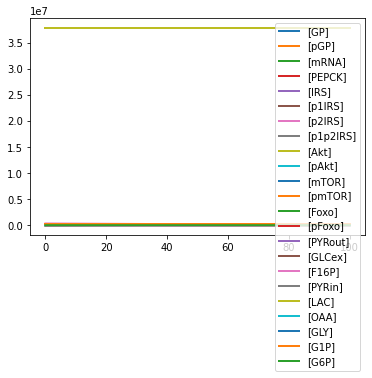

In [28]:
results = noguchi2013.simulate(0, 100, 1000)
noguchi2013.plot(results)

In [4]:
noguchi2013.getFloatingSpeciesIds()

['GP',
 'pGP',
 'mRNA',
 'PEPCK',
 'IRS',
 'p1IRS',
 'p2IRS',
 'p1p2IRS',
 'Akt',
 'pAkt',
 'mTOR',
 'pmTOR',
 'Foxo',
 'pFoxo',
 'PYRout',
 'GLCex',
 'F16P',
 'PYRin',
 'LAC',
 'OAA',
 'GLY',
 'G1P',
 'G6P']

In [6]:
noguchi2013.pGP

0.1723

In [19]:
import libsbml

In [33]:
noguchi2013_sbml = libsbml.readSBMLFromString(noguchi2013.getSBML())
model = noguchi2013_sbml.getModel()

In [34]:
model.getNumSpecies()

23

In [36]:
model.getNumCVTerms()

9

In [37]:
# is there a way to get the CV terms?

<libcombine.SBaseList; proxy of <Swig Object of type 'ListWrapper< SBase > *' at 0x7fae4687b570> >

## BIOMD0000000474 - Smith2013 - Regulation of Insulin Signalling by Oxidative Stress


Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668293/ - Computational modelling of the regulation of Insulin signalling by oxidative stress

Variables/parameters: Insulin, Insulin receptors, various protein kinases, FOXO, reactive oxygen species, mRNA

Time scale: minutes to hours

In [4]:
model = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000474.2?filename=BIOMD0000000474_url.xml')
model.resetToOrigin()
print(model.getAntimony())

// Created by libAntimony v2.13.2
function function_358(v)
  v;
end

function_358 is "Constant flux (irreversible)"

function function_359(kexp, nucleus, nucleus_RNA_InR)
  nucleus_RNA_InR*nucleus*kexp;
end

function_359 is "Function for export of InR RNA_1"

function function_360(cytoplasm, cytoplasm_RNA_InR, kmdeg)
  cytoplasm_RNA_InR*cytoplasm*kmdeg/cytoplasm;
end

function_360 is "Function for cyto degr of InR RNA_1"

function function_361(cytoplasm, cytoplasm_RNA_InR, ktransl)
  cytoplasm_RNA_InR*cytoplasm*ktransl/cytoplasm;
end

function_361 is "Function for translation of InR_1"

function function_362(cytoplasm, cytoplasm_InR, kpdeg)
  cytoplasm_InR*cytoplasm*kpdeg/cytoplasm;
end

function_362 is "Function for degradation of InR protein_1"

function function_363(kexp, nucleus, nucleus_RNA_SOD2)
  nucleus_RNA_SOD2*nucleus*kexp;
end

function_363 is "Function for export of SOD2 RNA_1"

function function_364(cytoplasm, cytoplasm_RNA_SOD2, kmdeg)
  cytoplasm_RNA_SOD2*cytoplasm*kmdeg

## BIOMD0000000449 - Brännmark2013 - Insulin signalling in human adipocytes (diabetic condition)

Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3617287/ - Insulin Signaling in Type 2 Diabetes
EXPERIMENTAL AND MODELING ANALYSES REVEAL MECHANISMS OF INSULIN RESISTANCE IN HUMAN ADIPOCYTES

Variables/parameters: insulin, insulin receptors, insulin receptor substrates, mTORC1, other signaling proteins, glucose

Species: human (isolated adipocytes)

Time scale: minutes

In [5]:
model = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000449.2?filename=BIOMD0000000449_url.xml')
model.resetToOrigin()
print(model.getAntimony())

// Created by libAntimony v2.13.2
model *MODEL1304160000()

  // Compartments and Species:
  compartment cellvolume;
  species IR in cellvolume, IRp in cellvolume, IRins in cellvolume, IRip in cellvolume;
  species IRi in cellvolume, IRS1 in cellvolume, IRS1p in cellvolume, IRS1p307 in cellvolume;
  species IRS1307 in cellvolume, X in cellvolume, Xp in cellvolume, PKB in cellvolume;
  species PKB308p in cellvolume, PKB473p in cellvolume, PKB308p473p in cellvolume;
  species mTORC1 in cellvolume, mTORC1a in cellvolume, mTORC2 in cellvolume;
  species mTORC2a in cellvolume, AS160 in cellvolume, AS160p in cellvolume;
  species GLUT4m in cellvolume, GLUT4 in cellvolume, S6K in cellvolume, S6Kp in cellvolume;
  species S6 in cellvolume, S6p in cellvolume;

  // Assignment Rules:
  measuredIRp := scaleIR*(IRp + IRip);
  measuredIRint := IRi + IRip;
  measuredIRS1p := scaleIRS1*(IRS1p + IRS1p307);
  measuredIRS1307 := scaleIRS1307*(IRS1p307 + IRS1307);
  measuredPKB308p := scalePKB308*(PKB308

## BIOMD0000000448 - Brännmark2013 - Insulin signalling in human adipocytes (normal condition)

Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3617287/ - Insulin Signaling in Type 2 Diabetes
EXPERIMENTAL AND MODELING ANALYSES REVEAL MECHANISMS OF INSULIN RESISTANCE IN HUMAN ADIPOCYTES

Variables/parameters: insulin, insulin receptors, insulin receptor substrates, mTORC1, other signaling proteins, glucose

Species: human (isolated adipocytes)

Time scale: minutes

## BIOMD0000000379 - DallaMan2007_MealModel_GlucoseInsulinSystem

Ref: https://pubmed.ncbi.nlm.nih.gov/17926672/ or https://web.archive.org/web/20170829211001/http://www.isbgroup.eu/Workshops2011/dallaman.pdf

Variables/parameters: Glucose and insulin in the liver and periphery

Species: normal humans (based on a database of 204 individuals with tracer meal protocols)

Time scale: minutes-hours

In [6]:
model = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000379.2?filename=BIOMD0000000379_url.xml')
model.resetToOrigin()
print(model.getAntimony())

// Created by libAntimony v2.13.2
model *DallaMan2007_MealModel_GlucoseInsulinSystem()

  // Compartments and Species:
  compartment Compartment1;
  species $G_p in Compartment1, $G_t in Compartment1, $I_l in Compartment1;
  species $I_p in Compartment1, $Q_sto1 in Compartment1, $Q_gut in Compartment1;
  species $Q_sto2 in Compartment1, $I_1 in Compartment1, $I_d in Compartment1;
  species $X in Compartment1, $I_po in Compartment1, $Y in Compartment1;

  // Assignment Rules:
  EGP := k_p1 - k_p2*G_p - k_p3*I_d - k_p4*I_po;
  Ra := f*k_abs*Q_gut/BW;
  E := 0;
  U_id := U_idm;
  m_3 := HE*m_1/(1 - HE);
  S := gamma_*I_po;
  k_empt := k_min + ((k_max - k_min)/2)*((tanh(aa*(Q_sto - b*D)) - tanh(cc*(Q_sto - d*D))) + 2);
  I := I_p/V_I;
  S_po := Y + K*((EGP + Ra - E - U_ii - k_1*G_p) + k_2*G_t)/V_G + S_b;
  G := G_p/V_G;
  aa := 5/2/(1 - b)/D;
  cc := 5/2/d/D;
  V_mmax := (1 - part)*(V_m0 + V_mX*X);
  HE := -m_5*S + m_6;
  Q_sto := Q_sto1 + Q_sto2;
  U_idm := V_mmax*G_t/(K_m0 + G_t);
  U :=

## BIOMD0000000356 - Nyman2011_M3Hierarachical_InsulinGlucosedynamics

Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3138269/ - A Hierarchical Whole-body Modeling Approach Elucidates the Link between in Vitro Insulin Signaling and in Vivo Glucose Homeostasis

Variables/parameters: Glucose, insulin, GLUT4 (glucose transporter), insulin receptors and signaling proteins in adipose tissue. This is used as a subcomponent in the previous whole-body model.

Species: human (adipose tissue as well as whole-body)

Time scale: minutes- hours

In [7]:
model = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000356.2?filename=BIOMD0000000356_url.xml')
model.resetToOrigin()
print(model.getAntimony())

// Created by libAntimony v2.13.2
model *Nyman2011_M3Hierarachical_InsulinGlucosedynamics()

  // Compartments and Species:
  compartment default;
  species r0 in default, r1 in default, r2 in default, r11 in default, r12 in default;
  species r22 in default, r1x2 in default, r11x2 in default, r1x22 in default;
  species r1x22d in default, r11x22 in default, rend in default, rendP in default;
  species iendIR in default, iend in default, rPbasal in default, IRS in default;
  species IRSiP in default, X in default, X_P in default, PI3K in default;
  species PI3K_ in default, PDK1 in default, PDK1_ in default, PKC in default;
  species PKC_P in default, PKB in default, PKB_P in default, mTOR in default;
  species mTOR_ in default, GLUT4_C in default, GLUT4_M in default;

  // Assignment Rules:
  vglucoseuptake := k_glut1*G_t/(KmG1 + G_t) + k_glut4*GLUT4_M*G_t/(KmG4 + G_t) + kbf*(INS + 5);
  KD := 7e-6;
  S2 := 0;
  S1 := (INS + 5)*1e-12;
  K4 := 1400;
  K8 := 0.01;
  aa := 5/2/(1 - b)/D;

## BIOMD0000000349 - Fridlyand2010_GlucoseSensitivity_B

Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2896931/ - Glucose sensing in the pancreatic beta cell: a computational systems analysis

Variables/parameters: Glucose, Metabolites - G3P, PYR, ATP, NADH, Calcium

Species: rat, human

Time scale: seconds-minutes

In [8]:
model = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000349.2?filename=BIOMD0000000349_url.xml')
model.resetToOrigin()
print(model.getAntimony())

// Created by libAntimony v2.13.2
model *Fridlyand2010_GlucoseSensitivity_B()

  // Compartments and Species:
  compartment compartment_;
  species $G3P in compartment_, $PYR in compartment_, $ATP in compartment_;
  species $NADHm in compartment_, $NADHc in compartment_, $Vm in compartment_;
  species $Cam in compartment_;

  // Assignment Rules:
  JGlu := Vmglu*Glu^hgl*ATP*(1/(Kmgl^hgl + Glu^hgl))*(1/(KmATP + ATP));
  Jgpd := Vmgpd*G3P*NADc*(1/(G3P + Kmg3p))*(1/(KgNc + NADc*(1/NADHc)))*(1/NADHc);
  JPYR := Vmpdh*FPNAD*FPCa*FPYR;
  JLDH := Vmldh*FLNADc*PYR*(1/(KmLD + PYR));
  Jph := Vmph*AD*AT*ACa;
  Jhres := Vme*FTe*FDe;
  Jtnadh := Tnadh*FNADc*NADm*(1/(KTNm + NADm*(1/NADHm)))*(1/NADHm);
  Jhl := (Plb + Plr)*exp(klp*Vm);
  Juni := PCa*ZCa*Vm*(am*Cam*exp(-(Vm*ZCa*(1/Tv))) + -(ai*Cac))*(1/Tv)*(1/(-1 + exp(-(Vm*ZCa*(1/Tv)))));
  JNCa := Vmnc*(exp(0.5*Vm*Ni^3*Cam*(1/(Tv*KNaj^3*KCaj))) + -exp(-(0.5*Vm*Nam^3*Cac*(1/(Tv*KNaj^3*KCaj)))))*(1/DelJNCa);
  ACa := 1 + -(1*(1/exp(Cam*(1/KpCam))));
